In [1]:
import os
import json
import matplotlib.pyplot as plt
import re

In [2]:
def plot_metrics(parent_folder, metrics, title="", b=4):
    """
    This function finds the two subfolders in the parent folder, reads all JSON files in each,
    and plots the specified metrics over time steps.

    :param parent_folder: Path to the parent folder
    :param metrics: List of metrics to be plotted
    """
    # Find subfolders in the parent folder
    subfolders = [f.path for f in os.scandir(parent_folder) if f.is_dir()]


    # Regular expression to extract the numeric part from filenames
    step_pattern = re.compile(r"step_(\d+)\.json")

    # Iterate over each subfolder
    for subfolder in subfolders:
        time_steps = []
        data = {metric: [] for metric in metrics}

        # Find and sort the JSON files by the numeric step
        files = [
            f
            for f in os.listdir(subfolder)
            if f.endswith(".json") and step_pattern.match(f)
        ]
        files.sort(key=lambda f: int(step_pattern.match(f).group(1)))

        # Read each sorted JSON file
        for file_name in files:
            file_path = os.path.join(subfolder, file_name)
            with open(file_path, "r") as file:
                json_data = json.load(file)
                # Extract the step number from the file name
                step = int(step_pattern.match(file_name).group(1))
                time_steps.append(step * b)

                # Collect the metrics values
                for metric in metrics:
                    value = json_data.get(metric, None)
                    if isinstance(value, list) and len(value) > 1:
                        # Take the second element if the value is a list and has at least 2 elements
                        data[metric].append(value[1])
                    else:
                        data[metric].append(value)


        # Plot the metrics for the subfolder
        for metric in metrics:
            plt.plot(
                time_steps,
                data[metric],
                label=f"{' '.join(os.path.basename(subfolder).replace('_', '  ').split()[:-1])} - {metric}",
            )

    plt.xlabel("Examples finetuned on")
    plt.ylabel("Metric Value")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1.1)
    plt.show()


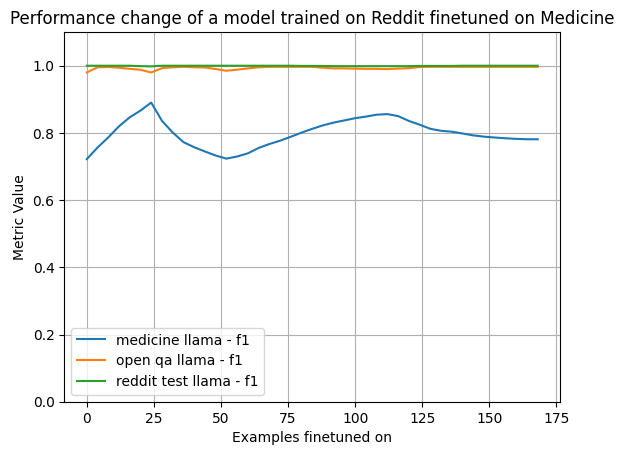

In [3]:
EVAL_FOLDER = "models/train_conf_open_qa_llama/eval"
metrics_to_plot = [
    # "accuracy",
    "f1",
]  # Replace with the list of metrics you want to plot
title="Performance change of a model trained on Reddit finetuned on Medicine"
plot_metrics(EVAL_FOLDER, metrics_to_plot, title, b=4)

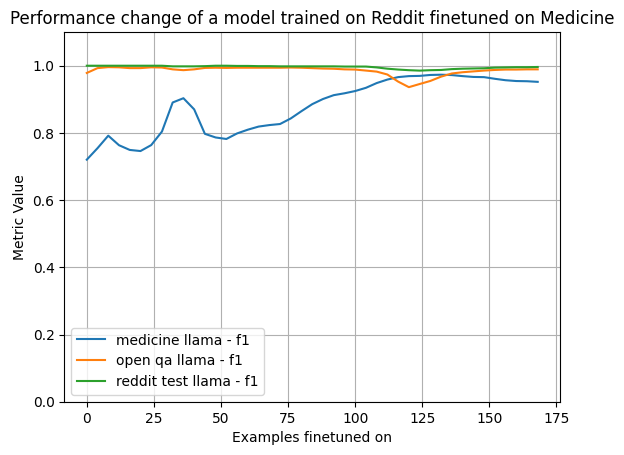

In [4]:
EVAL_FOLDER = "models/train_conf_medicine_llama/eval"
metrics_to_plot = [
    # "accuracy",
    "f1",
]  # Replace with the list of metrics you want to plot
title="Performance change of a model trained on Reddit finetuned on Medicine"
plot_metrics(EVAL_FOLDER, metrics_to_plot, title, b=4)

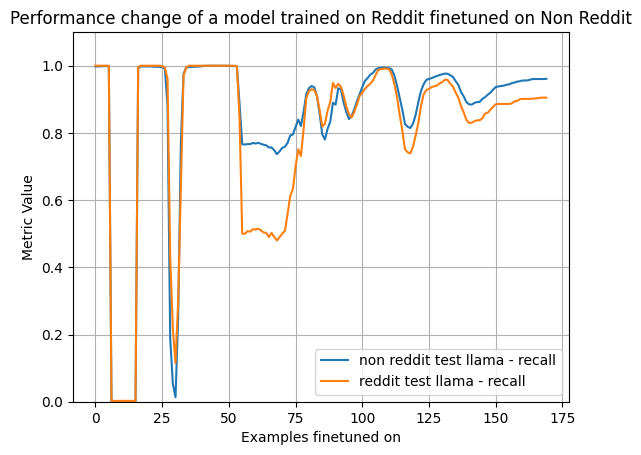

In [8]:
EVAL_FOLDER = "models/train_conf_non_reddit_test_llama/eval"
metrics_to_plot = [
    # "f1",
    "recall",
    # "precision",
]  # Replace with the list of metrics you want to plot
title="Performance change of a model trained on Reddit finetuned on Non Reddit"
plot_metrics(EVAL_FOLDER, metrics_to_plot, title,b=1)